In [114]:
import pickle
import pandas as pd

In [115]:
def load_in_participant_data(path):
    with open(path, 'rb') as pickle_file:
        loaded_data = pickle.load(pickle_file)

    NeedToSearch = loaded_data['NeedToSearch']
    CorrectSearch = loaded_data['CorrectSearch']
    IncorrectSearch = loaded_data['IncorrectSearch']

    return NeedToSearch, CorrectSearch, IncorrectSearch

In [116]:
path = r"C:\Users\gxb18167\PycharmProjects\SIGIR_EEG_GAN\Development\Information-Need\Data\stat_features\participant_001_Features.pkl"

In [117]:
NeedToSearch, CorrectSearch, IncorrectSearch = load_in_participant_data(path)

In [118]:

from math import floor
import numpy as np

def create_x_y(NeedToSearch, CorrectSearch, IncorrectSearch):
    # Assuming you have three arrays with data
    need_to_search = NeedToSearch
    correct_search = CorrectSearch
    incorrect_search = IncorrectSearch

    correct_search = correct_search[np.random.choice(correct_search.shape[0], floor(len(need_to_search)/2), replace=False)]
    print(incorrect_search.shape[0])
    incorrect_search = incorrect_search[np.random.choice(incorrect_search.shape[0], floor(len(need_to_search)/2), replace=False)]

    # Combine the data and create corresponding labels
    X = np.concatenate([need_to_search, correct_search, incorrect_search], axis=0)

    # Create labels (0 for Need to Search, 1 for others)
    y_need_to_search = np.zeros(len(need_to_search))
    y_others = np.ones(len(correct_search) + len(incorrect_search))

    # Concatenate labels and shuffle the data
    y = np.concatenate([y_need_to_search, y_others])
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    X_shuffled = X[indices]
    y_shuffled = y[indices]

    return X_shuffled, y_shuffled



In [119]:
def clear_nan(need_to_search, correct_search, incorrect_search):
    need_to_search = NeedToSearch[0]
    correct_search = CorrectSearch[0]
    incorrect_search = IncorrectSearch[0]

    need_to_search = np.array(need_to_search)
    correct_search = np.array(correct_search)
    incorrect_search = np.array(incorrect_search)

    need_to_search = need_to_search[~np.isnan(need_to_search).any(axis=1)]
    correct_search = correct_search[~np.isnan(correct_search).any(axis=1)]
    incorrect_search = incorrect_search[~np.isnan(incorrect_search).any(axis=1)]

    return need_to_search, correct_search, incorrect_search




In [120]:
ParticipantList = ["01", "02", "03", "04", "05", "08", "09", "10", "12", "13", "14", "16", "17", "18", "19", "21", "22", "24"]

In [121]:
X_list = []
Y_list = []

for participant in ParticipantList:
    path = fr"C:\Users\gxb18167\PycharmProjects\SIGIR_EEG_GAN\Development\Information-Need\Data\stat_features\participant_0{participant}_Features.pkl"
    print(participant)

    NeedToSearch, CorrectSearch, IncorrectSearch = load_in_participant_data(path)


    NeedToSearch, CorrectSearch, IncorrectSearch = clear_nan(NeedToSearch, CorrectSearch, IncorrectSearch)
    X, Y = create_x_y(NeedToSearch, CorrectSearch, IncorrectSearch)
    X_list.append(X)
    Y_list.append(Y)






01
262
02
223
03
252
04
167
05
205
08
198
09
358
10
281
12
200
13
198
14
233
16
217
17
101
18
244
19
123
21
424
22
281
24
204


In [122]:
X_all = np.concatenate(X_list, axis=0)
Y_all = np.concatenate(Y_list, axis=0)

In [123]:
def count_classes(my_array):
    unique_values, counts = np.unique(my_array, return_counts=True)

    # Print the results
    for value, count in zip(unique_values, counts):
        print(f"The value {value} occurs {count} times in the array.")

In [124]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


def get_metrics(model, X_Test, Y_Test):
    y_pred = model.predict(X_Test)
    precision, recall, f1, support = precision_recall_fscore_support(Y_Test, y_pred, average='weighted')
    accuracy = accuracy_score(Y_Test, y_pred)
    print(precision, recall, f1, accuracy)
    metrics = [precision, recall, f1, accuracy]
    return accuracy

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=1)

In [126]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


def create_confusion_matrix_plot(model, X_Test, Y_Test, classes,show_plot=False):
    """
    Creator : Niall

    Function used to print a confusion matrix and classification report for a given model

    Args:
        model: the trained model
        X_Test: the X test data
        Y_Test: the Y labels for the test data
        classes: a list containing the class names as string

    Returns:
        prints the confusion matrix and returns a dictionary containing the classification report

    """
    y_pred = model.predict(X_Test)

    clr = classification_report(Y_Test, y_pred, target_names=classes)
    dict_clr = classification_report(Y_Test, y_pred, target_names=classes, output_dict=True)

    cm = confusion_matrix(Y_Test, y_pred)


    if show_plot:
        plt.figure(figsize=(8, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
        plt.tick_params(labelsize=25)
        plt.xticks(np.arange(len(classes)) + 0.5, classes)
        plt.yticks(np.arange(len(classes)) + 0.5, classes)
        plt.xlabel("Predicted", fontdict={'size': 25})
        plt.ylabel("Actual", fontdict={'size': 25})
        plt.title("Confusion Matrix", fontdict={'size': 25})
        plt.savefig("ConfusionMatrix.png")
        plt.show()


    print("Classification Report:\n----------------------\n", clr)
    return cm,dict_clr

In [132]:
clf = RandomForestClassifier(max_depth=20, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=1)

In [133]:
metrics = get_metrics(clf, X_test, y_test)

print(metrics)

0.6270980595322279 0.6244588744588745 0.6230321158902407 0.6244588744588745
0.6244588744588745


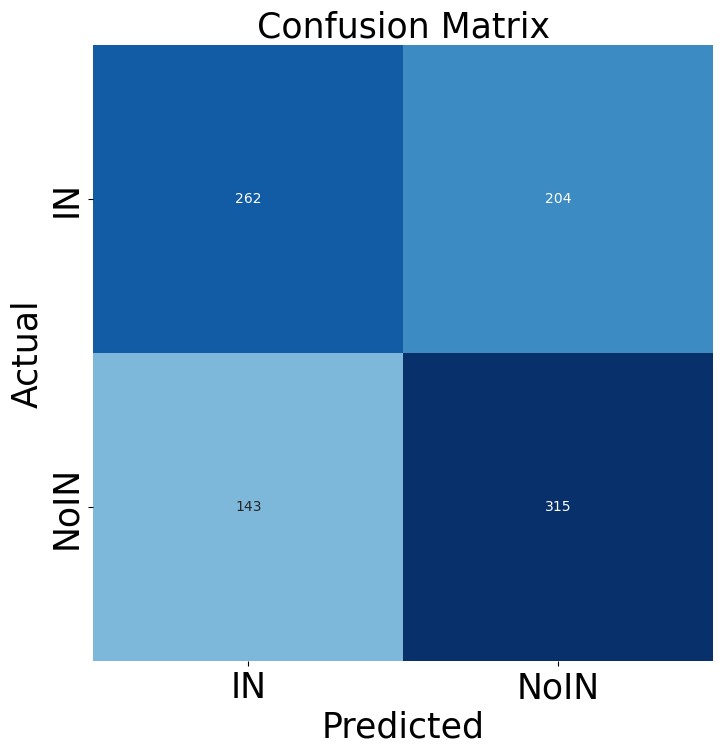

Classification Report:
----------------------
               precision    recall  f1-score   support

          IN       0.65      0.56      0.60       466
        NoIN       0.61      0.69      0.64       458

    accuracy                           0.62       924
   macro avg       0.63      0.63      0.62       924
weighted avg       0.63      0.62      0.62       924



(array([[262, 204],
        [143, 315]], dtype=int64),
 {'IN': {'precision': 0.6469135802469136,
   'recall': 0.5622317596566524,
   'f1-score': 0.6016073478760046,
   'support': 466},
  'NoIN': {'precision': 0.6069364161849711,
   'recall': 0.6877729257641921,
   'f1-score': 0.6448311156601841,
   'support': 458},
  'accuracy': 0.6244588744588745,
  'macro avg': {'precision': 0.6269249982159424,
   'recall': 0.6250023427104223,
   'f1-score': 0.6232192317680944,
   'support': 924},
  'weighted avg': {'precision': 0.6270980595322279,
   'recall': 0.6244588744588745,
   'f1-score': 0.6230321158902407,
   'support': 924}})

In [134]:
create_confusion_matrix_plot(clf, X_test, y_test, ["IN", "NoIN"], show_plot=True)